## TASK 1
1. Using any finance API (we use Yahoo Finance and Tiingo during sessions) download historical
   stock prices for Google (symbol ‘GOOG’), for the period 1 Jan 2020 to 1 Jan 2021.
2. Save these prices to csv file with Pandas.
3. Read this csv file to display data saved.
4. Plot a simple diagram to display closing prices for GOOG stock.

Using stooq

In [4]:
import pandas as pd
import requests
import io

ticker = 'GOOGL.US'
interval = 'd'
url = f'https://stooq.com/q/d/l/?s={ticker}&i={interval}'

#getting the data
data=requests.get(url).content
goog=pd.read_csv(io.StringIO(data.decode('utf-8')))
#giving format to the table
goog=goog.sort_values(by=['Date'],ascending=True,inplace=False)#sorting
dat = (goog['Date'] > '2020-01-01') & (goog['Date'] <= '2021-01-01') #selecting dates
goog = goog.loc[dat] #selecting the dataset by dates
goog=goog.set_index('Date')#using date as index

goog

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,67.4205,68.4340,67.3245,68.4340,27285300.0
2020-01-03,67.4000,68.6875,67.3660,68.0760,23412580.0
2020-01-06,67.5815,69.9160,67.5500,69.8905,46786860.0
2020-01-07,70.0230,70.1750,69.5780,69.7555,34529120.0
2020-01-08,69.7410,70.5925,69.6315,70.2520,35325480.0
...,...,...,...,...,...
2020-12-24,86.4500,87.1205,86.2175,86.7080,9312760.0
2020-12-28,87.2455,89.3500,87.0910,88.6980,27650740.0
2020-12-29,89.3615,89.4235,87.7555,87.8880,19725740.0


In [6]:
#Save these prices to csv file with Pandas.
#Read this csv file to display data saved.

import pandas as pd

goog.to_csv('goog_historical.csv',  date_format='%Y-%m-%d') 

goog_df = pd.read_csv('goog_historical.csv', index_col='Date', parse_dates=True)

goog_df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,67.4205,68.4340,67.3245,68.4340,27285300.0
2020-01-03,67.4000,68.6875,67.3660,68.0760,23412580.0
2020-01-06,67.5815,69.9160,67.5500,69.8905,46786860.0
2020-01-07,70.0230,70.1750,69.5780,69.7555,34529120.0
2020-01-08,69.7410,70.5925,69.6315,70.2520,35325480.0
...,...,...,...,...,...
2020-12-24,86.4500,87.1205,86.2175,86.7080,9312760.0
2020-12-28,87.2455,89.3500,87.0910,88.6980,27650740.0
2020-12-29,89.3615,89.4235,87.7555,87.8880,19725740.0


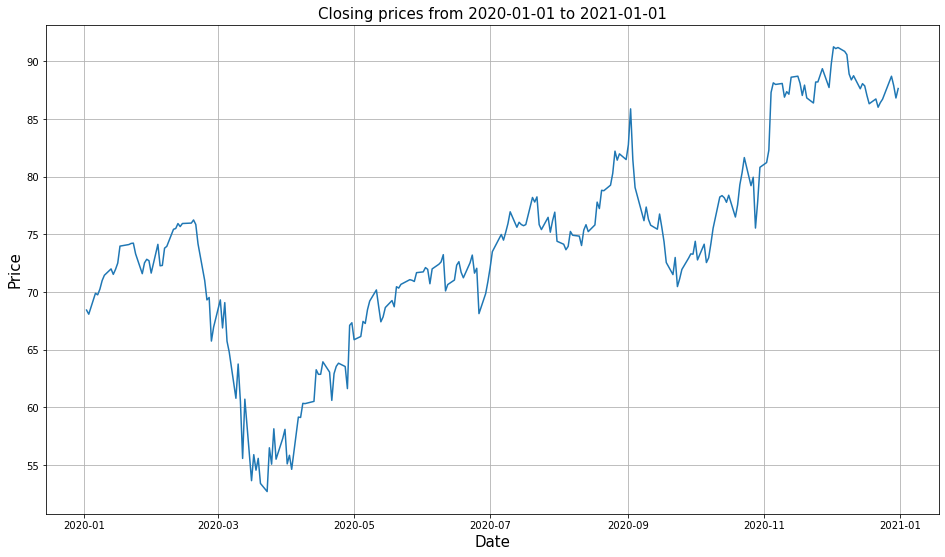

In [9]:
#Plot a simple diagram to display closing prices for GOOG stock.

import matplotlib.pyplot as plt

plt.figure(figsize = (16,9))
plt.title('Closing prices from 2020-01-01 to 2021-01-01',fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(goog_df['Close'])
plt.show()

   using Yahoo Finance:

In [37]:
import pandas as pd
import pandas_datareader as pdr
import datetime 

start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2021, 1, 1)
symbols = ["GOOG"]
goog = pdr.get_data_yahoo(symbols,start, end)
#giving format to the table
goog=goog.stack()

goog

,Attributes,Adj Close,Close,High,Low,Open,Volume
Date,Symbols,,,,,,
2020-01-02,GOOG,68.368500,68.368500,68.406998,67.077499,67.077499,28132000
2020-01-03,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000
2020-01-06,GOOG,69.710503,69.710503,69.824997,67.500000,67.500000,34646000
2020-01-07,GOOG,69.667000,69.667000,70.149498,69.518997,69.897003,30054000
2020-01-08,GOOG,70.216003,70.216003,70.579002,69.542000,69.603996,30560000
...,...,...,...,...,...,...,...
2020-12-24,GOOG,86.942497,86.942497,87.300003,86.455498,86.750000,6936000
2020-12-28,GOOG,88.804497,88.804497,89.536400,87.316750,87.581749,27860000
2020-12-29,GOOG,87.935997,87.935997,89.622002,87.804497,89.389503,25988000


In [32]:
#Save these prices to csv file with Pandas.
#Read this csv file to display data saved.

import pandas as pd

goog.to_csv('goog_historical.csv',  date_format='%Y-%m-%d') 

goog_df = pd.read_csv('goog_historical.csv', header=0, index_col='Date', parse_dates=True)

goog_df

,Symbols,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,GOOG,68.368500,68.368500,68.406998,67.077499,67.077499,28132000
2020-01-03,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000
2020-01-06,GOOG,69.710503,69.710503,69.824997,67.500000,67.500000,34646000
2020-01-07,GOOG,69.667000,69.667000,70.149498,69.518997,69.897003,30054000
2020-01-08,GOOG,70.216003,70.216003,70.579002,69.542000,69.603996,30560000
...,...,...,...,...,...,...,...
2020-12-24,GOOG,86.942497,86.942497,87.300003,86.455498,86.750000,6936000
2020-12-28,GOOG,88.804497,88.804497,89.536400,87.316750,87.581749,27860000
2020-12-29,GOOG,87.935997,87.935997,89.622002,87.804497,89.389503,25988000


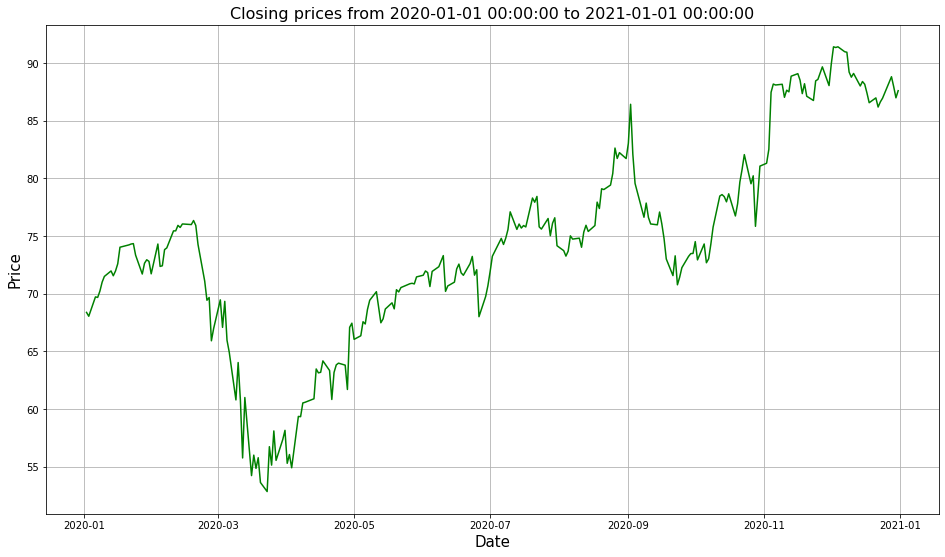

In [36]:
#Plot a simple diagram to display closing prices for GOOG stock.

import matplotlib.pyplot as plt

plt.figure(figsize = (16,9))
plt.title('Closing prices from {} to {}'.format(start,end),fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(goog_df['Close'], 'g')
plt.show()

Using Tiingo:

In [39]:
import pandas_datareader as pdr


api_key='b29ae4708599a88951bae6694aaafba5d793ecee' 

start="2020-1-1"
end="2021-1-1"

df = pdr.tiingo.TiingoDailyReader('GOOG', start=start, end=end, api_key=api_key)


goog = df.read()

goog

close       high       low      open  \
symbol date                                                                
GOOG   2020-01-02 00:00:00+00:00  1367.37  1368.1400  1341.550  1341.550   
       2020-01-03 00:00:00+00:00  1360.66  1372.5000  1345.544  1347.860   
       2020-01-06 00:00:00+00:00  1394.21  1396.5000  1350.000  1350.000   
       2020-01-07 00:00:00+00:00  1393.34  1402.9900  1390.380  1397.940   
       2020-01-08 00:00:00+00:00  1404.32  1411.5800  1390.840  1392.080   
...                                   ...        ...       ...       ...   
       2020-12-24 00:00:00+00:00  1738.85  1746.0000  1729.110  1735.000   
       2020-12-28 00:00:00+00:00  1776.09  1790.7276  1746.335  1751.635   
       2020-12-29 00:00:00+00:00  1758.72  1792.4400  1756.090  1787.790   
       2020-12-30 00:00:00+00:00  1739.52  1765.0950  1725.600  1762.010   
       2020-12-31 00:00:00+00:00  1751.88  1758.9300  1735.420  1735.420   

                                   volume  adjClose   adjHigh    adjLow  \
symbol date                                                               
GOOG   2020-01-02 00:00:00+00:00  1406731   68.3685  68.40700  67.07750   
       2020-01-03 00:00:00+00:00  1187006   68.0330  68.62500  67.27720   
       2020-01-06 00:00:00+00:00  1733149   69.7105  69.82500  67.50000   
       2020-01-07 00:00:00+00:00  1511693   69.6670  70.14950  69.51900   
       2020-01-08 00:00:00+00:00  1529177   70.2160  70.57900  69.54200   
...                                   ...       ...       ...       ...   
       2020-12-24 00:00:00+00:00   346753   86.9425  87.30000  86.45550   
       2020-12-28 00:00:00+00:00  1390962   88.8045  89.53638  87.31675   
       2020-12-29 00:00:00+00:00  1299395   87.9360  89.62200  87.80450   
       2020-12-30 00:00:00+00:00  1306130   86.9760  88.25475  86.28000   
       2020-12-31 00:00:00+00:00  1012240   87.5940  87.94650  86.77100   

                                   adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                  
GOOG   2020-01-02 00:00:00+00:00  67.07750   28134620      0.0          1.0  
       2020-01-03 00:00:00+00:00  67.39300   23740120      0.0          1.0  
       2020-01-06 00:00:00+00:00  67.50000   34662980      0.0          1.0  
       2020-01-07 00:00:00+00:00  69.89700   30233860      0.0          1.0  
       2020-01-08 00:00:00+00:00  69.60400   30583540      0.0          1.0  
...                                    ...        ...      ...          ...  
       2020-12-24 00:00:00+00:00  86.75000    6935060      0.0          1.0  
       2020-12-28 00:00:00+00:00  87.58175   27819240      0.0          1.0  
       2020-12-29 00:00:00+00:00  89.38950   25987900      0.0          1.0  
       2020-12-30 00:00:00+00:00  88.10050   26122600      0.0          1.0  
       2020-12-31 00:00:00+00:00  86.77100   20244800      0.0          1.0  

[253 rows x 12 columns]

In [40]:
#Save these prices to csv file with Pandas.
#Read this csv file to display data saved.

import pandas as pd

goog.to_csv('goog_historical.csv',  date_format='%Y-%m-%d') 

goog_df = pd.read_csv('goog_historical.csv', header=0, index_col='date', parse_dates=True)

goog_df

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2020-01-02,GOOG,1367.37,1368.1400,1341.550,1341.550,1406731,68.3685,68.40700,67.07750,67.07750,28134620,0.0,1.0
2020-01-03,GOOG,1360.66,1372.5000,1345.544,1347.860,1187006,68.0330,68.62500,67.27720,67.39300,23740120,0.0,1.0
2020-01-06,GOOG,1394.21,1396.5000,1350.000,1350.000,1733149,69.7105,69.82500,67.50000,67.50000,34662980,0.0,1.0
2020-01-07,GOOG,1393.34,1402.9900,1390.380,1397.940,1511693,69.6670,70.14950,69.51900,69.89700,30233860,0.0,1.0
2020-01-08,GOOG,1404.32,1411.5800,1390.840,1392.080,1529177,70.2160,70.57900,69.54200,69.60400,30583540,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,GOOG,1738.85,1746.0000,1729.110,1735.000,346753,86.9425,87.30000,86.45550,86.75000,6935060,0.0,1.0
2020-12-28,GOOG,1776.09,1790.7276,1746.335,1751.635,1390962,88.8045,89.53638,87.31675,87.58175,27819240,0.0,1.0
2020-12-29,GOOG,1758.72,1792.4400,1756.090,1787.790,1299395,87.9360,89.62200,87.80450,89.38950,25987900,0.0,1.0


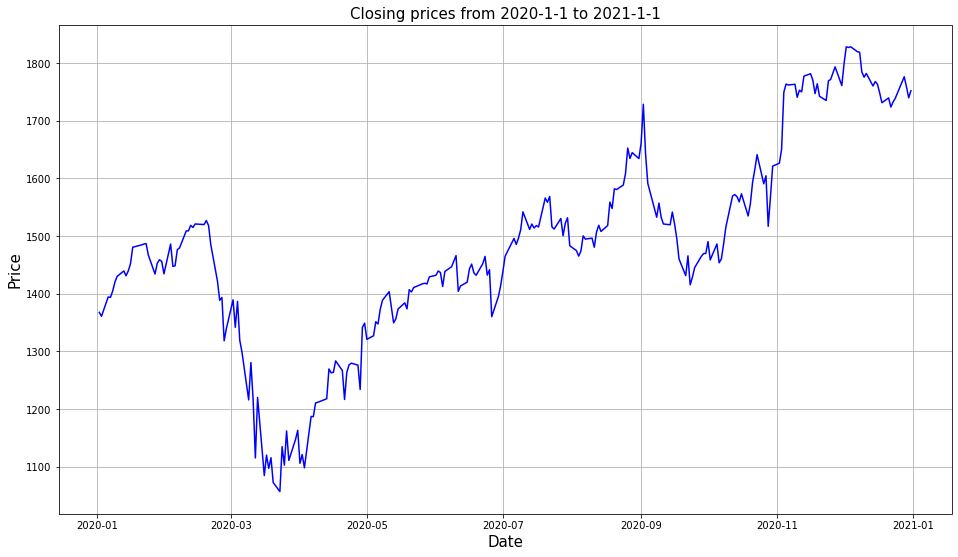

In [42]:
#Plot a simple diagram to display closing prices for GOOG stock.

import matplotlib.pyplot as plt

plt.figure(figsize = (16,9))
plt.title('Closing prices from {} to {}'.format(start,end),fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(goog_df['close'],'b')
plt.show()

## TASK 2
1. Repeat exactly the same steps and plot a similar diagram for Microsoft stock.
2. NB: Microsoft ticker symbol is ‘MSFT’


Using any finance API (we use Yahoo Finance and Tiingo during sessions) download historical stock prices for Google (symbol ‘GOOG’), for the period 1 Jan 2020 to 1 Jan 2021

Using Stooq:

In [63]:
import pandas as pd
import requests
import io

ticker = 'MSFT.US'
interval = 'd'
url = f'https://stooq.com/q/d/l/?s={ticker}&i={interval}'

#getting the data
data=requests.get(url).content
msft_sto=pd.read_csv(io.StringIO(data.decode('utf-8')))
#giving format to the table
msft_sto=msft_sto.sort_values(by=['Date'],ascending=True,inplace=False)#sorting
date = (msft_sto['Date'] > '2020-01-01') & (msft_sto['Date'] <= '2021-01-01') #selecting dates
msft_sto = msft_sto.loc[date] #selecting the dataset by dates
msft_sto= msft_sto.rename(columns=str.lower)
msft_sto=msft_sto.set_index('date')#using date as index
msft_sto

,open,high,low,close,volume
date,,,,,
2020-01-02,155.129,157.004,154.690,156.905,2.316759e+07
2020-01-03,154.680,156.286,154.420,154.979,2.161910e+07
2020-01-06,153.443,155.448,152.894,155.378,2.131717e+07
2020-01-07,155.667,156.017,153.682,153.941,2.239706e+07
2020-01-08,155.278,157.074,154.311,156.426,2.841583e+07
...,...,...,...,...,...
2020-12-24,218.621,220.776,218.401,219.938,1.068584e+07
2020-12-28,221.594,223.170,220.207,222.103,1.816342e+07
2020-12-29,223.450,224.318,220.746,221.295,1.762634e+07


Using Yahoo Finance:

In [76]:
#download historical stock prices for Microsoft (symbol  ‘MSFT’), for the period 1 Jan 2020 to 1 Jan 2021.

import pandas as pd
import pandas_datareader as pdr
import datetime 
from pandas_datareader import data

start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2021, 1, 1)
symbols = ['MSFT']
msft_yh = pdr.get_data_yahoo(symbols,start, end)
#giving format to the table
msft_yh=msft_yh.stack()
msft_yh=msft_yh.reset_index('Date')
msft_yh= msft_yh.rename(columns=str.lower)#to convert to lower case the column headers
msft_yh

Attributes,date,adj close,close,high,low,open,volume
Symbols,,,,,,,
MSFT,2020-01-02,156.924408,160.619995,160.729996,158.330002,158.779999,22622100.0
MSFT,2020-01-03,154.970398,158.619995,159.949997,158.059998,158.320007,21116200.0
MSFT,2020-01-06,155.371002,159.029999,159.100006,156.509995,157.080002,20813700.0
MSFT,2020-01-07,153.954330,157.580002,159.669998,157.320007,159.320007,21634100.0
MSFT,2020-01-08,156.406570,160.089996,160.800003,157.949997,158.929993,27746500.0
...,...,...,...,...,...,...,...
MSFT,2020-12-24,219.930298,222.750000,223.610001,221.199997,221.419998,10550600.0
MSFT,2020-12-28,222.112350,224.960007,226.029999,223.020004,224.449997,17933500.0
MSFT,2020-12-29,221.312576,224.149994,227.179993,223.580002,226.309998,17403200.0


Using Tiingo:

In [65]:
#download historical stock prices for Microsoft (symbol  ‘MSFT’), for the period 1 Jan 2020 to 1 Jan 2021.

import pandas_datareader as pdr


api_key='b29ae4708599a88951bae6694aaafba5d793ecee' 

start="2020-1-1"
end="2021-1-1"

df = pdr.tiingo.TiingoDailyReader('MSFT', start=start, end=end, api_key=api_key)


msft_tii = df.read()

msft_tii

close    high     low    open    volume  \
symbol date                                                                  
MSFT   2020-01-02 00:00:00+00:00  160.62  160.73  158.33  158.78  22634546   
       2020-01-03 00:00:00+00:00  158.62  159.95  158.06  158.32  21121681   
       2020-01-06 00:00:00+00:00  159.03  159.10  156.51  157.08  20826702   
       2020-01-07 00:00:00+00:00  157.58  159.67  157.32  159.32  21881740   
       2020-01-08 00:00:00+00:00  160.09  160.80  157.95  158.93  27762026   
...                                  ...     ...     ...     ...       ...   
       2020-12-24 00:00:00+00:00  222.75  223.61  221.20  221.42  10550572   
       2020-12-28 00:00:00+00:00  224.96  226.03  223.02  224.45  17762701   
       2020-12-29 00:00:00+00:00  224.15  227.18  223.58  226.31  17403213   
       2020-12-30 00:00:00+00:00  221.68  225.63  221.47  225.23  20272337   
       2020-12-31 00:00:00+00:00  222.42  223.00  219.68  221.70  20942132   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
MSFT   2020-01-02 00:00:00+00:00  156.906897  157.014354  154.669835   
       2020-01-03 00:00:00+00:00  154.953131  156.252385  154.406077   
       2020-01-06 00:00:00+00:00  155.353653  155.422035  152.891909   
       2020-01-07 00:00:00+00:00  153.937173  155.978858  153.683184   
       2020-01-08 00:00:00+00:00  156.389149  157.082736  154.298620   
...                                      ...         ...         ...   
       2020-12-24 00:00:00+00:00  219.906541  220.755563  218.376327   
       2020-12-28 00:00:00+00:00  222.088330  223.144671  220.173094   
       2020-12-29 00:00:00+00:00  221.288670  224.279991  220.725946   
       2020-12-30 00:00:00+00:00  218.850200  222.749777  218.642881   
       2020-12-31 00:00:00+00:00  219.580754  220.153350  216.875730   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
MSFT   2020-01-02 00:00:00+00:00  155.109433   22634546      0.0          1.0  
       2020-01-03 00:00:00+00:00  154.660067   21121681      0.0          1.0  
       2020-01-06 00:00:00+00:00  153.448732   20826702      0.0          1.0  
       2020-01-07 00:00:00+00:00  155.636949   21881740      0.0          1.0  
       2020-01-08 00:00:00+00:00  155.255965   27762026      0.0          1.0  
...                                      ...        ...      ...          ...  
       2020-12-24 00:00:00+00:00  218.593519   10550572      0.0          1.0  
       2020-12-28 00:00:00+00:00  221.584840   17762701      0.0          1.0  
       2020-12-29 00:00:00+00:00  223.421097   17403213      0.0          1.0  
       2020-12-30 00:00:00+00:00  222.354883   20272337      0.0          1.0  
       2020-12-31 00:00:00+00:00  218.869945   20942132      0.0          1.0  

[253 rows x 12 columns]

Save these prices to csv file with Pandas and read this csv file to display data saved.

In [77]:
import pandas as pd

msft_sto.to_csv('msft_sto_historical.csv',  date_format='%Y-%m-%d') 
msft_yh.to_csv('msft_yh_historical.csv',  date_format='%Y-%m-%d') 
msft_tii.to_csv('msft_tii_historical.csv',  date_format='%Y-%m-%d') 

In [80]:
#stooq

msft_sto = pd.read_csv('msft_sto_historical.csv', header=0, index_col='date', parse_dates=True)
msft_sto

,open,high,low,close,volume
date,,,,,
2020-01-02,155.129,157.004,154.690,156.905,2.316759e+07
2020-01-03,154.680,156.286,154.420,154.979,2.161910e+07
2020-01-06,153.443,155.448,152.894,155.378,2.131717e+07
2020-01-07,155.667,156.017,153.682,153.941,2.239706e+07
2020-01-08,155.278,157.074,154.311,156.426,2.841583e+07
...,...,...,...,...,...
2020-12-24,218.621,220.776,218.401,219.938,1.068584e+07
2020-12-28,221.594,223.170,220.207,222.103,1.816342e+07
2020-12-29,223.450,224.318,220.746,221.295,1.762634e+07


In [81]:
#yahoo

msft_yh = pd.read_csv('msft_yh_historical.csv', header=0, index_col='date', parse_dates=True)
msft_yh

,Symbols,adj close,close,high,low,open,volume
date,,,,,,,
2020-01-02,MSFT,156.924408,160.619995,160.729996,158.330002,158.779999,22622100.0
2020-01-03,MSFT,154.970398,158.619995,159.949997,158.059998,158.320007,21116200.0
2020-01-06,MSFT,155.371002,159.029999,159.100006,156.509995,157.080002,20813700.0
2020-01-07,MSFT,153.954330,157.580002,159.669998,157.320007,159.320007,21634100.0
2020-01-08,MSFT,156.406570,160.089996,160.800003,157.949997,158.929993,27746500.0
...,...,...,...,...,...,...,...
2020-12-24,MSFT,219.930298,222.750000,223.610001,221.199997,221.419998,10550600.0
2020-12-28,MSFT,222.112350,224.960007,226.029999,223.020004,224.449997,17933500.0
2020-12-29,MSFT,221.312576,224.149994,227.179993,223.580002,226.309998,17403200.0


In [82]:
#tiingo 

msft_tii = pd.read_csv('msft_tii_historical.csv', header=0, index_col='date', parse_dates=True)
msft_tii

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2020-01-02,MSFT,160.62,160.73,158.33,158.78,22634546,156.906897,157.014354,154.669835,155.109433,22634546,0.0,1.0
2020-01-03,MSFT,158.62,159.95,158.06,158.32,21121681,154.953131,156.252385,154.406077,154.660067,21121681,0.0,1.0
2020-01-06,MSFT,159.03,159.10,156.51,157.08,20826702,155.353653,155.422035,152.891909,153.448732,20826702,0.0,1.0
2020-01-07,MSFT,157.58,159.67,157.32,159.32,21881740,153.937173,155.978858,153.683184,155.636949,21881740,0.0,1.0
2020-01-08,MSFT,160.09,160.80,157.95,158.93,27762026,156.389149,157.082736,154.298620,155.255965,27762026,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,MSFT,222.75,223.61,221.20,221.42,10550572,219.906541,220.755563,218.376327,218.593519,10550572,0.0,1.0
2020-12-28,MSFT,224.96,226.03,223.02,224.45,17762701,222.088330,223.144671,220.173094,221.584840,17762701,0.0,1.0
2020-12-29,MSFT,224.15,227.18,223.58,226.31,17403213,221.288670,224.279991,220.725946,223.421097,17403213,0.0,1.0


Plot a simple diagram to display closing prices for MSFT stock.

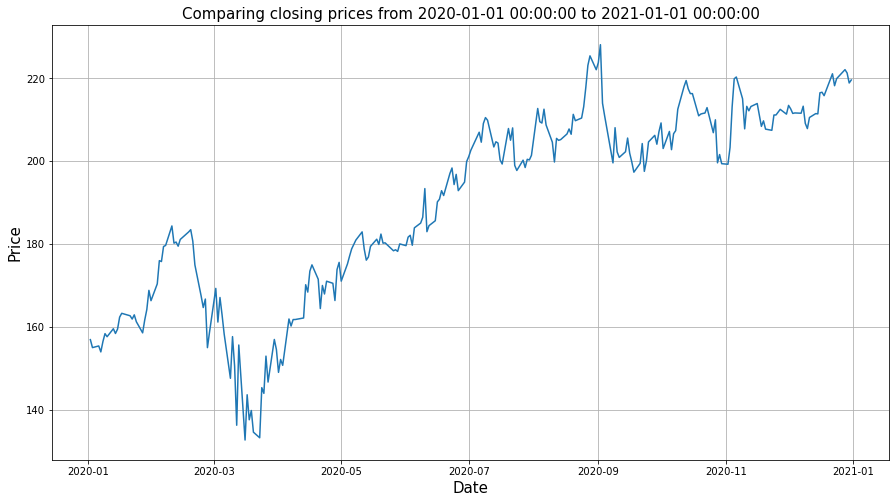

In [85]:
import matplotlib.pyplot as plt

#stooq

plt.figure(figsize = (15,8))
plt.title('Comparing closing prices from {} to {}'.format(start,end),fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(msft_sto['close'])
plt.show()

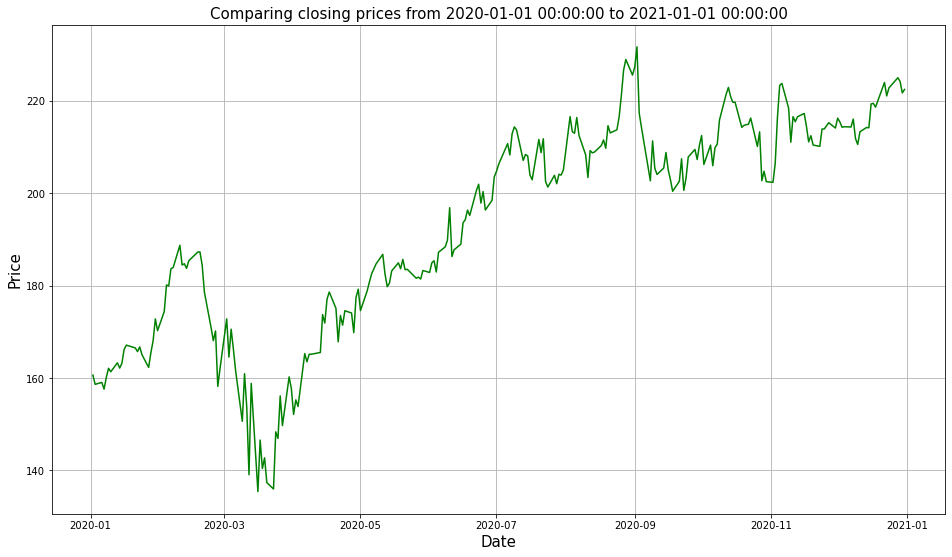

In [83]:
#Plot a simple diagram to display closing prices for MSFT stock.
import matplotlib.pyplot as plt

#yahoo

plt.figure(figsize = (16,9))
plt.title('Comparing closing prices from {} to {}'.format(start,end),fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(msft_yh['close'],'g')
plt.show()

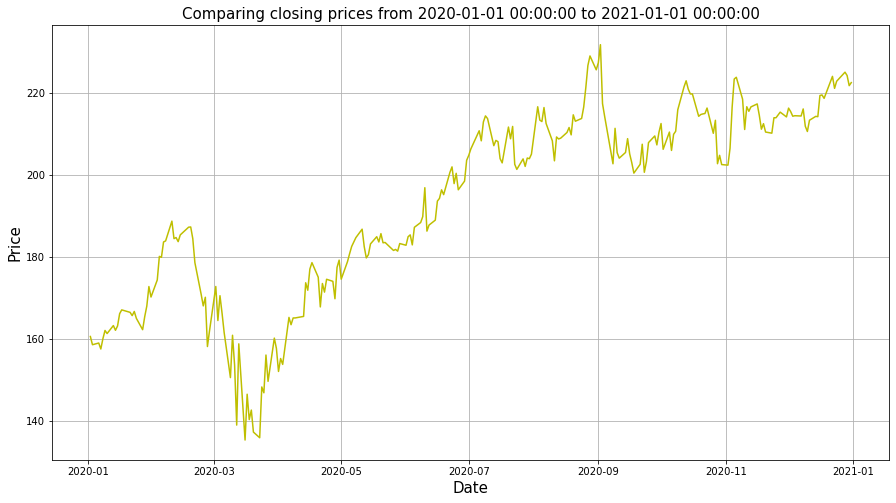

In [86]:
#Plot a simple diagram to display closing prices for MSFT stock.
import matplotlib.pyplot as plt

#tiingo

plt.figure(figsize = (15,8))
plt.title('Comparing closing prices from {} to {}'.format(start,end),fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(msft_tii['close'],'y')
plt.show()

Ploting a simple diagram to compare closing and opening prices for MSFT stock.

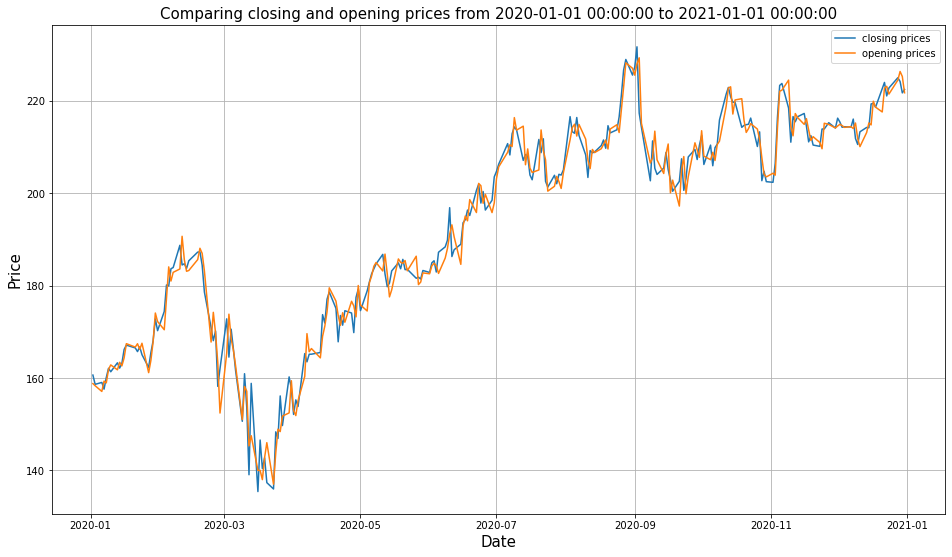

In [87]:
#using yahoo data
import matplotlib.pyplot as plt

plt.figure(figsize = (16,9))
plt.title('Comparing closing and opening prices from {} to {}'.format(start,end),fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(axis='both')
plt.plot(msft_yh['close'])
plt.plot(msft_yh['open'])
plt.legend(['closing prices','opening prices'])
plt.show()